In [1]:
!nvidia-smi

Tue Apr  1 11:48:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.03             Driver Version: 572.60         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   37C    P4             11W /   38W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%%time
import cudf

susy_train = cudf.read_csv("susy_train.csv")
display(susy_train.head())
display(susy_train.shape)


,class_label,lepton1_pT,lepton1_eta,lepton1_phi,lepton2_pT,lepton2_eta,lepton2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.603398,1.802803,-0.123960,0.920238,1.699006,1.030643,0.286911,-0.070914,0.036027,0.500789,0.602167,0.376384,0.554666,0.000000,0.534747,0.336005,0.467806,0.101831
1,0.0,0.606726,1.226416,-0.670075,0.710308,1.783991,-1.392452,0.120845,-0.396684,0.084163,0.382006,0.570976,0.211316,0.328421,0.279305,0.414727,0.581146,0.159815,0.036998
2,1.0,4.584427,-0.224092,1.343997,2.606531,0.078394,-0.459578,1.829672,-0.464246,0.056510,-1.482101,3.247900,3.250473,0.888099,0.000000,3.132812,0.702898,0.236721,0.418931
3,0.0,0.734998,-0.033779,-1.592004,1.037622,0.436785,-0.045486,0.305629,0.390285,0.321896,0.045875,0.735606,0.552646,0.666685,0.496308,0.741670,0.382423,1.070006,0.136849
4,0.0,0.609223,-0.737582,-1.229357,0.726425,-1.466236,1.212800,0.817217,0.280290,1.226743,-0.471540,0.599436,0.924825,1.369096,1.636853,0.640423,1.243817,1.256532,0.277033


(3333333, 19)

CPU times: user 3.47 s, sys: 1.12 s, total: 4.59 s
Wall time: 14.3 s


In [3]:
%%time
import cudf

susy_test = cudf.read_csv("susy_test.csv")
display(susy_test.head())
display(susy_test.shape)


,class_label,lepton1_pT,lepton1_eta,lepton1_phi,lepton2_pT,lepton2_eta,lepton2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.691280,1.769201,-1.711811,0.476238,1.540563,-0.267858,0.872984,0.278745,1.087132,-0.551878,0.512544,0.891626,1.543717,0.860364,0.583060,0.691560,1.500089,0.559077
1,0.0,0.417667,-1.888612,-0.225399,0.572387,-1.194098,0.070454,0.695429,1.663371,1.043925,-0.382097,0.427828,0.809541,1.679137,1.760872,0.439944,1.310742,1.367967,0.191391
2,1.0,0.274744,-1.383963,-1.033036,0.439080,1.670371,-0.675462,0.748248,0.907954,1.123212,-0.434616,0.900805,0.702888,0.692425,1.529867,0.932529,1.168535,1.545469,0.002309
3,1.0,1.165006,1.004205,-1.223371,1.627817,-0.376755,0.839448,2.003187,1.606087,2.768745,2.292744,1.515240,1.375575,0.805598,0.000000,1.529152,1.256361,1.523800,0.004668
4,1.0,1.404497,-0.145557,0.052160,0.655964,1.246058,1.403647,0.671340,-1.685370,0.629945,-0.338737,1.190204,1.109146,0.826956,0.759544,1.145565,1.110235,0.260206,0.326079


(1666667, 19)

CPU times: user 1.43 s, sys: 257 ms, total: 1.68 s
Wall time: 2.93 s


# PCA without Scaling

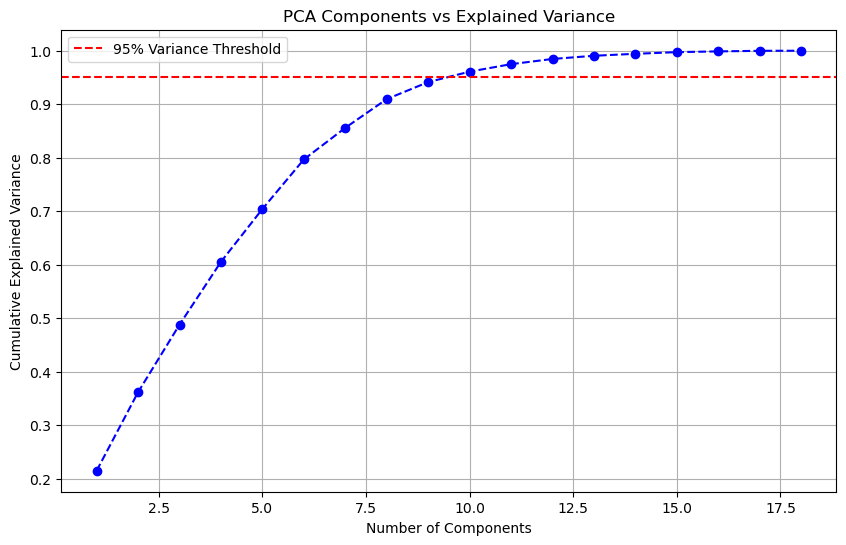

Optimal number of components: 10
Variance retained: 96.09%


'Explained Variance Ratios:'

0    0.214691
1    0.146820
2    0.126269
3    0.117493
4    0.098820
5    0.092570
6    0.059183
7    0.053706
8    0.031770
9    0.019569
dtype: float64

'PCA Transformed Training Data:'

,0,1,2,3,4,5,6,7,8,9,class_label
0,-2.074722,-0.148353,2.477934,0.662587,-0.025387,0.630341,-0.486023,-0.071395,-0.034592,-0.183017,0.0
1,-2.072875,0.155398,2.124092,-0.478791,0.143718,-0.480691,1.446444,0.391490,0.366385,-0.350873,0.0
2,2.203291,-4.081752,-0.087150,-1.404588,2.996213,0.216471,-0.455978,0.219993,-1.393190,-1.606624,1.0
3,-1.386721,0.039260,0.281872,1.265776,0.302529,-0.399665,0.956910,0.331242,-0.165392,0.205280,0.0
4,0.285742,1.142015,-1.561850,1.704205,0.024756,0.412295,0.018825,-0.515303,0.065938,0.163550,0.0


'PCA Transformed Test Data:'

,0,1,2,3,4,5,6,7,8,9,class_label
0,-0.207224,0.997198,2.334171,1.183887,-0.106581,-0.450042,1.220670,-0.166065,-0.807582,0.085136,0.0
1,0.090551,1.521463,-2.188396,0.815054,-0.071329,-1.335265,-0.598599,0.490521,0.125617,0.143163,0.0
2,-0.050190,0.996351,0.195129,0.685382,0.118160,-1.165646,0.723756,2.156169,0.141729,0.487583,1.0
3,0.793919,-1.995205,0.450312,1.957480,-2.350689,-0.947197,-0.346560,-0.977876,0.192329,1.062413,1.0
4,-0.211779,-0.159286,0.784431,0.168680,0.618296,2.191528,-0.128245,0.987009,0.055047,-0.726434,1.0


CPU times: user 4.8 s, sys: 994 ms, total: 5.79 s
Wall time: 6.71 s


In [4]:
%%time
from cuml import PCA
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Separate features and labels
X_train = susy_train.drop('class_label', axis=1)
y_train = susy_train['class_label']
X_test = susy_test.drop('class_label', axis=1)
y_test = susy_test['class_label']

# Fit PCA with maximum components
max_components = min(X_train.shape[0], X_train.shape[1])
pca = PCA(n_components=max_components, output_type='cudf')
pca.fit(X_train)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_.values_host  # Convert to numpy
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', linestyle='--', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Components vs Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal components for 95% variance retention
threshold = 0.95
optimal_n = np.argmax(cumulative_variance >= threshold) + 1  # +1 for 1-based indexing
print(f"Optimal number of components: {optimal_n}")
print(f"Variance retained: {cumulative_variance[optimal_n-1]:.2%}")

# Re-fit and transform with optimal components
final_pca = PCA(n_components=optimal_n, output_type='cudf')
final_pca.fit(X_train)
X_train_pca = final_pca.transform(X_train)
X_test_pca = final_pca.transform(X_test)

# Create final DataFrames with labels
train_pca_df = X_train_pca.copy()
train_pca_df['class_label'] = y_train.reset_index(drop=True)
test_pca_df = X_test_pca.copy()
test_pca_df['class_label'] = y_test.reset_index(drop=True)

# Display results
display("Explained Variance Ratios:", final_pca.explained_variance_ratio_)
display("PCA Transformed Training Data:", train_pca_df.head())
display("PCA Transformed Test Data:", test_pca_df.head())


# PCA with Standard Scaling  

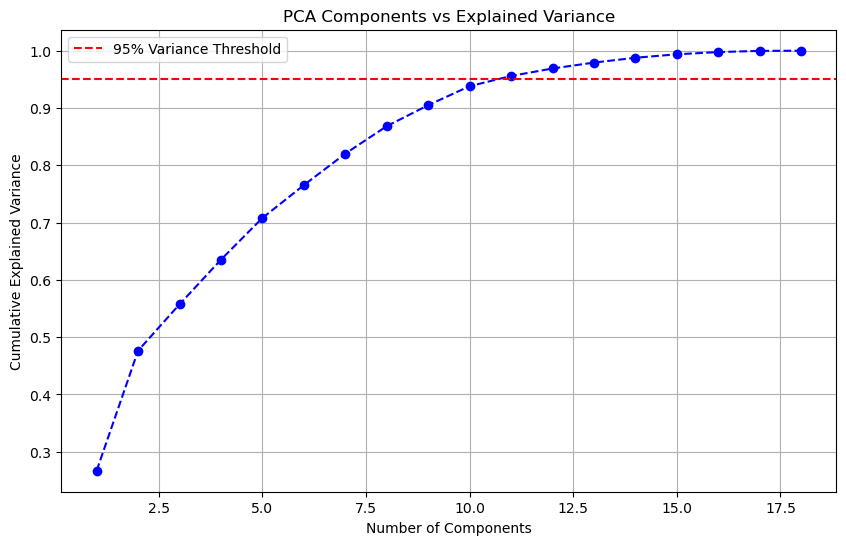

Optimal number of components: 11
Variance retained: 95.59%


'Explained Variance Ratios:'

0     0.266946
1     0.209509
2     0.080927
3     0.077955
4     0.072729
5     0.057311
6     0.054956
7     0.047983
8     0.036635
9     0.033157
10    0.017814
dtype: float64

'PCA Transformed Training Data:'

,0,1,2,3,4,5,6,7,8,9,10,class_label
0,-2.883697,-0.813971,0.116372,-2.471707,-0.664308,0.595376,-0.497118,0.476277,0.485198,-0.071104,0.043084,0.0
1,-3.199520,-0.796116,0.787497,-2.120143,0.480234,-0.502513,-0.234183,1.269505,-1.442079,0.389642,-0.258098,0.0
2,5.320564,-6.010878,1.495596,0.085948,1.411651,-0.031107,-3.268769,-1.148945,0.453780,0.218843,-0.532330,1.0
3,-1.916510,-0.487961,-0.004321,-0.281696,-1.262414,-0.394375,0.152617,-0.579256,-0.955748,0.331033,0.054958,0.0
4,0.037631,1.697932,0.292589,1.553892,-1.697797,0.433968,0.316380,-0.351247,-0.019261,-0.513495,0.247557,0.0


'PCA Transformed Test Data:'

,0,1,2,3,4,5,6,7,8,9,10,class_label
0,-0.211635,2.046073,-0.516115,-2.332041,-1.184264,-0.515971,-1.062765,-1.402027,-1.221363,-0.163697,0.096863,0.0
1,-0.317346,2.323482,0.243234,2.179208,-0.809548,-1.278644,0.825192,-0.453244,0.597599,0.489258,0.487307,0.0
2,-0.738065,0.779905,0.135831,-0.192716,-0.677434,-1.040609,1.933589,-0.413757,-0.720754,2.150313,-0.917718,1.0
3,1.430390,-1.469754,-2.989749,-0.432314,-1.976209,-0.813481,1.664026,0.790307,0.345536,-0.974580,-0.109891,1.0
4,-0.096217,-0.617284,1.147497,-0.786546,-0.164929,2.087145,-1.463968,0.832363,0.128347,0.982598,-0.566552,1.0


CPU times: user 3.29 s, sys: 1.78 s, total: 5.07 s
Wall time: 5.63 s


In [5]:
%%time
from cuml import PCA
from cuml.preprocessing import StandardScaler  # Import the StandardScaler from cuML
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Separate features and labels
X_train = susy_train.drop('class_label', axis=1)
y_train = susy_train['class_label']
X_test = susy_test.drop('class_label', axis=1)
y_test = susy_test['class_label']

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA with maximum components on scaled data
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
pca = PCA(n_components=max_components, output_type='cudf')
pca.fit(X_train_scaled)

# Calculate cumulative explained variance
explained_variance = pca.explained_variance_ratio_.values_host  # Convert to numpy
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
         marker='o', linestyle='--', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Components vs Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal components for 95% variance retention
threshold = 0.95
optimal_n = np.argmax(cumulative_variance >= threshold) + 1  # +1 for 1-based indexing
print(f"Optimal number of components: {optimal_n}")
print(f"Variance retained: {cumulative_variance[optimal_n-1]:.2%}")

# Re-fit and transform with optimal components on scaled data
final_pca = PCA(n_components=optimal_n, output_type='cudf')
final_pca.fit(X_train_scaled)
X_train_pca = final_pca.transform(X_train_scaled)
X_test_pca = final_pca.transform(X_test_scaled)

# Create final DataFrames with labels
train_pca_df = X_train_pca.copy()
train_pca_df['class_label'] = y_train.reset_index(drop=True)
test_pca_df = X_test_pca.copy()
test_pca_df['class_label'] = y_test.reset_index(drop=True)

# Display results
display("Explained Variance Ratios:", final_pca.explained_variance_ratio_)
display("PCA Transformed Training Data:", train_pca_df.head())
display("PCA Transformed Test Data:", test_pca_df.head())


'Principal Components:'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.217386,-0.000607,0.002355,0.108392,0.000021,0.000521,0.414720,-0.001808,0.474615,-0.254546,0.163078,0.333229,0.172104,0.372781,0.190619,0.356385,0.080605,0.053616
1,-0.391257,0.002149,0.002273,-0.386951,0.003147,-0.000630,-0.163296,0.002121,0.110099,-0.397729,-0.395909,-0.132798,0.211995,0.364808,-0.362475,0.116638,0.040894,0.033408
2,0.001561,0.706862,0.000844,0.001221,0.707335,0.002170,0.001207,-0.001696,-0.000016,0.001689,0.001358,0.000728,-0.000554,-0.001474,0.001216,-0.000498,-0.000044,0.000070
3,0.000694,-0.000018,-0.723545,-0.000050,-0.000029,0.585346,-0.000422,0.365843,0.000015,-0.002150,0.000350,0.000759,0.000524,0.002020,0.000382,0.000983,-0.000538,0.000050
4,0.183838,0.001077,0.003218,0.209260,-0.000065,-0.009888,-0.455846,0.016081,-0.328990,-0.677043,0.214751,0.059365,-0.110086,0.138656,0.221785,-0.022884,-0.128581,-0.019915
5,0.001668,-0.001198,0.037618,0.003589,-0.002524,0.562506,-0.010516,-0.825712,-0.005602,-0.013099,0.003066,-0.000180,-0.001978,0.002304,0.003464,-0.001166,-0.001256,-0.000799
6,-0.000247,-0.000611,-0.689234,0.000243,0.002209,-0.583824,-0.002094,-0.429045,0.001286,-0.003793,0.000223,-0.000013,0.000123,0.000743,0.000338,0.000280,-0.000267,-0.000039
7,0.000613,-0.707345,0.001403,0.000575,0.706864,0.001688,-0.000383,0.000096,-0.000620,-0.000217,0.000079,0.000170,-0.000456,-0.000439,-0.000038,-0.000090,-0.000383,-0.000065
8,-0.016063,0.000217,0.000157,0.107450,0.000282,-0.000475,-0.283009,-0.000618,0.022936,0.458538,0.116594,-0.206924,-0.197813,0.623374,0.029834,0.268975,-0.355528,-0.116375
9,-0.368717,-0.000062,0.000369,0.443872,0.000352,-0.000035,-0.301654,0.002666,0.465934,-0.019097,0.059554,-0.216579,-0.054607,-0.052362,0.156461,-0.100301,0.480607,-0.191999


'Explained Variance Ratio:'

0    0.214691
1    0.146820
2    0.126269
3    0.117493
4    0.098820
5    0.092570
6    0.059183
7    0.053706
8    0.031770
9    0.019569
dtype: float64

'Transformed Training Data (First 5 Rows):'

,0,1,2,3,4,5,6,7,8,9,class_label
0,-2.074722,-0.148353,2.477934,0.662587,-0.025387,0.630341,-0.486023,-0.071395,-0.034592,-0.183017,0.0
1,-2.072875,0.155398,2.124092,-0.478791,0.143718,-0.480691,1.446444,0.391490,0.366385,-0.350873,0.0
2,2.203291,-4.081752,-0.087150,-1.404588,2.996213,0.216471,-0.455978,0.219993,-1.393190,-1.606624,1.0
3,-1.386721,0.039260,0.281872,1.265776,0.302529,-0.399665,0.956910,0.331242,-0.165392,0.205280,0.0
4,0.285742,1.142015,-1.561850,1.704205,0.024756,0.412295,0.018825,-0.515303,0.065938,0.163550,0.0


'Transformed Test Data (First 5 Rows):'

,0,1,2,3,4,5,6,7,8,9,class_label
0,-0.207224,0.997198,2.334171,1.183887,-0.106581,-0.450042,1.220670,-0.166065,-0.807582,0.085136,0.0
1,0.090551,1.521463,-2.188396,0.815054,-0.071329,-1.335265,-0.598599,0.490521,0.125617,0.143163,0.0
2,-0.050190,0.996351,0.195129,0.685382,0.118160,-1.165646,0.723756,2.156169,0.141729,0.487583,1.0
3,0.793919,-1.995205,0.450312,1.957480,-2.350689,-0.947197,-0.346560,-0.977876,0.192329,1.062413,1.0
4,-0.211779,-0.159286,0.784431,0.168680,0.618296,2.191528,-0.128245,0.987009,0.055047,-0.726434,1.0


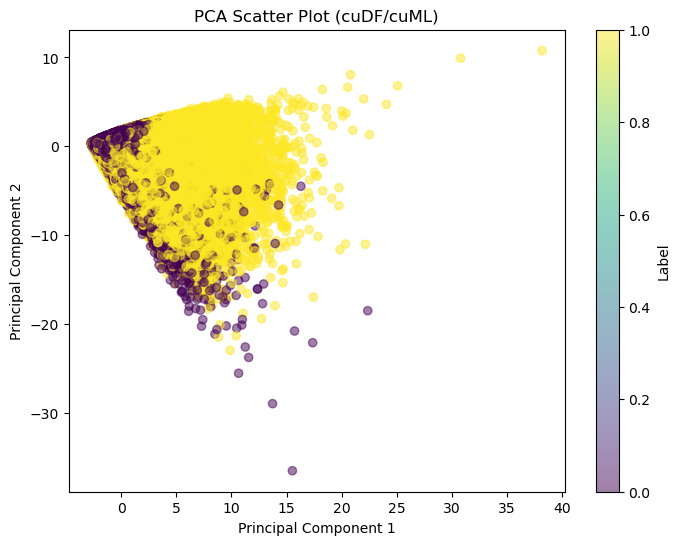

CPU times: user 42 s, sys: 688 ms, total: 42.7 s
Wall time: 42.6 s


In [7]:
%%time
# Import PCA from cuML
from cuml import PCA
from IPython.display import display
import matplotlib.pyplot as plt

# Separate features and target variable for both training and test datasets
X_train = susy_train.drop('class_label', axis=1)
y_train = susy_train['class_label']

X_test = susy_test.drop('class_label', axis=1)
y_test = susy_test['class_label']

# Initialize PCA model with 19 components (adjust n_components as needed)
pca = PCA(n_components=10, output_type='cudf')

# Fit PCA on the training features
pca.fit(X_train)

# Transform both training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# (Optional) Combine transformed features with labels for downstream tasks
# Safe: Create copies before adding labels to avoid label leaks
train_pca_df = X_train_pca.copy()
train_pca_df['class_label'] = y_train.reset_index(drop=True)

test_pca_df = X_test_pca.copy()
test_pca_df['class_label'] = y_test.reset_index(drop=True)

# Inspect results
display("Principal Components:", pca.components_)
display("Explained Variance Ratio:", pca.explained_variance_ratio_)
display("Transformed Training Data (First 5 Rows):", train_pca_df.head())
display("Transformed Test Data (First 5 Rows):", test_pca_df.head())

# Convert GPU data to Pandas for visualization (matplotlib requires CPU data)
X_train_pca_pd = X_train_pca.to_pandas()
y_train_pd = y_train.to_pandas().reset_index(drop=True)

# Plot (same as before)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca_pd[0], X_train_pca_pd[1], 
                      c=y_train_pd, cmap='viridis', alpha=0.5)
plt.title("PCA Scatter Plot (cuDF/cuML)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Label')
plt.show()
